In [0]:
gen_csvurl="https://storage.googleapis.com/kaggle-competitions-data/kaggle/3136/gender_submission.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1521989096&Signature=g7g2NqKJpneJ6xw2TKwr77Z9yIz%2FkCjdDbjlY7B%2BiK6Gohlrn7RqFGgcV1rICLNZg6MPsM5564FYcB4yNy%2Fs0iVXNLrXiVuFsQHeQcKu8r9JAgNMM9YgnZBN7%2BP%2Bi%2BiJ95ov2OHemR05wbpAFedWFWc7BJeg51nBRAbLgrCR4jv64ncww8gUoFv%2B3e%2Fki8wIJlEmywHwITvXLmSxAXgRIoxZQ6OW8fwOfLfAPbUvg4OuToHWY%2FdR0Ie%2FHZPDKCbfScRs%2FPVLjZUpBcndl8wk2r7L%2F3fnZViechgU8UB2LluuXJ7LpVYOlfME3C%2BaF8Px6oODQaDn8luvQ8yKkvOo%2Bg%3D%3D"

test_csvurl="https://storage.googleapis.com/kaggle-competitions-data/kaggle/3136/test.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1521989129&Signature=ZCtbFnY7RcpIZgMfeJSKiZnHeg7%2Fxd1vOlKhzTQANAvZBX%2BVXEWCBlxBAqZBM6pEX4LG1VXvFqGHl86UNei89KEDj%2B%2BQCpba36r7eeA6YyJgrZ7d2zMQC218lFGdNLI0VjyAnN9%2FimLumXC4gg6kVZ3AQuNamUq2ow3mNUPFl4qJzzAXfw%2FSnk7WY4zp5N1WqsN%2BLP2BVtp3DdrK7wSdYTN9Lkkt6VfKyG12Izha3seiwjQHcqVn%2B8brcNmszDh6Vljz1q7DSan4aG3xq96FP4C2bw3MSqiCTNW8t9tUiexqGz%2FRnFC6OmUFX%2FLv4gohX0ohzCKYikA7q4ETzqbBKw%3D%3D"

train_csvurl="https://storage.googleapis.com/kaggle-competitions-data/kaggle/3136/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1521989140&Signature=AbxTK02E5%2BBCkVT5y1vCjAE1BQXkaJqrTVwkR4iCUWOEQQsaFAN1y94aG0ZPntpKpWmDpacZQcgG9gIz0%2Bki5FbsnvdjSAtMbosE4gEKUH%2BfAu2Jw65LricxCIW58KroXa65YMaKKZ5Qi2ZfYhmcoCAIA89tAvySrs1yUX2mi%2FKhqcV0D6p8F0jA3hOry4HP6YoCtTdwWXmQfzqSdjB%2FVoRihVV%2B2B3dO3YyXmR5HSUVsrBhaHMUvNYOVCCKKTkoIsOFmuHCyQxcfw0HM60LgEwAPLk2HdrtYlzkAOoVOl3hcgauh0lsgpAL4GvGT3YPQQKXDYsOtBB%2Bq3e7jhhlvw%3D%3D"

In [0]:
import pandas as pd
import numpy as np
import random as rnd

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [0]:
train_df = pd.read_csv(train_csvurl) 
test_df = pd.read_csv(test_csvurl)
combine = [train_df, test_df]

In [31]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Fahlstrom, Mr. Arne Jonas",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [32]:
train_df[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived',ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [33]:
train_df[['Sex','Survived']].groupby(['Sex']).mean().sort_values(by='Survived',ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [34]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [35]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


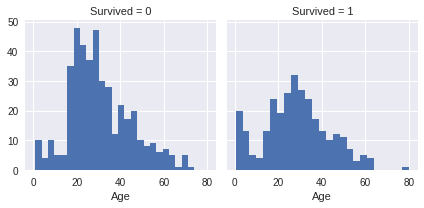

In [36]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age',bins=25)

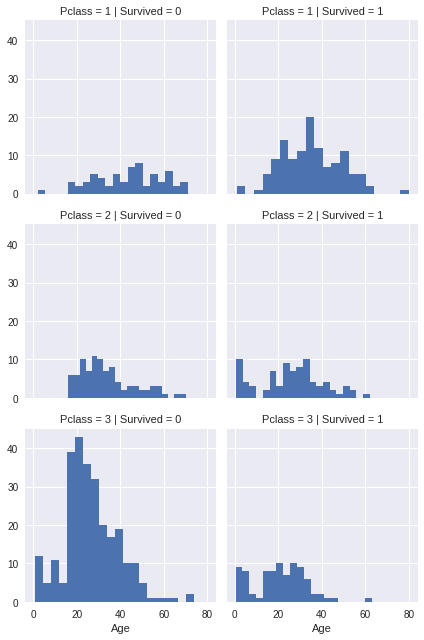

In [37]:
grid = sns.FacetGrid(train_df, col='Survived',row='Pclass')
grid.map(plt.hist,'Age',bins=20)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


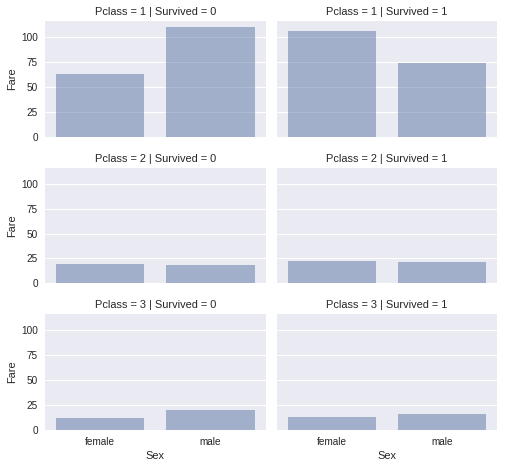

In [38]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

#Data Wrangling
Dropping unecessary features



In [0]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

In [54]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [0]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [56]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [57]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [58]:
#Dropping name after fetching titles
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [59]:
#Mapping Males->0 & Females->1
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1
